这是我跟随Coursera平台Deep Learning系列第4课卷积网络的笔记，方便以后查阅。

# 机器视觉(Computer vision)

随着神经网络的大量应用，特别是卷机网络的出现及应用，机器视觉领域在近几年突飞猛进。运用神经网络所能解决的机器视觉问题包括：
>1.图像分类（Image Classification）

>2.目标识别（Object Detection）

>3.风格迁移（Neural Style Transfer）

当然，在解决这些问题的过程中，还有很多问题有待思考，比如：
>图像过大，例如一张1000 * 1000像素的RGB图片就会有3000000个输入特征值，如果用传统的全连接网络（fully connected network），第一层用1000个神经元，权重矩阵W1就会是[1000,3000000]，这样会有太多的特征值有待确定，会给计算机的内存和处理器带来很大的挑战，所以设计一种能够降低维度的方法成为了我们的当务之急

在这种情况下，卷积网络就应运而生了

# 以边缘检测(Edge detection)为例

在一个神经网络中，我们可以说，前面的层(layer)可以检测到图像中的边缘，后面的层可以将这些边缘汇总来检测图像中目标物品的一部分，最后面的层再将这些部分汇总来检测整体的目标物品。

我们可以将这些边缘分为纵向边缘(vertical edge)和横向边缘(horizontal edge)。

## 纵向边缘

以一个6 x 6的灰度图像作为例子，经过一个3 x 3的过滤器(filter or kernel)，比如1、0、-1的三列适合于探测纵向边缘，会得到一个4 x 4的图像。在结果4 x 4图像中，中间亮度比较高的地方正是我们要找的纵向边缘。

这个过程就是我们所说的卷积，用过滤器3x3的数与图像中左上角的3x3的子矩阵进行矩阵逐元素相乘(element wise product)，结果再相加，得到矩阵中左上角的数。然后依次将过滤器在图像矩阵上平移得到完整的卷积结果。

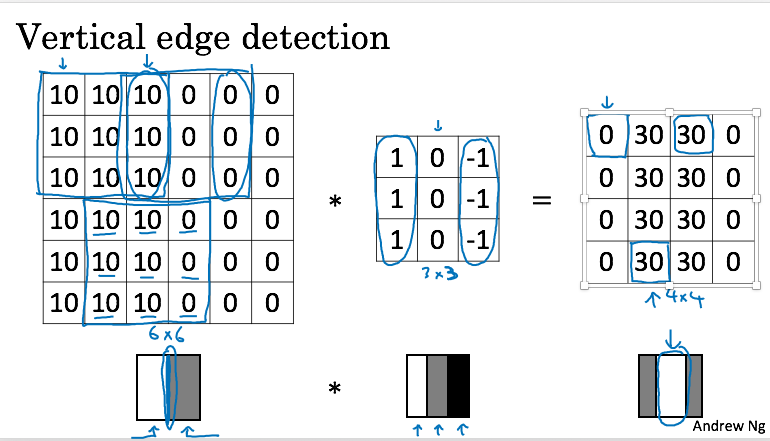

## 横向边缘
同样，我们可以用一个过滤器来探测图像中的横向边缘，但是我们要让过滤器旋转90度变成1、0、-1的三行。如果我们对另外一些方向上的边缘感兴趣的话，可以旋转对应的对数来改变过滤器的探测方向。

卷积的过程不改变。

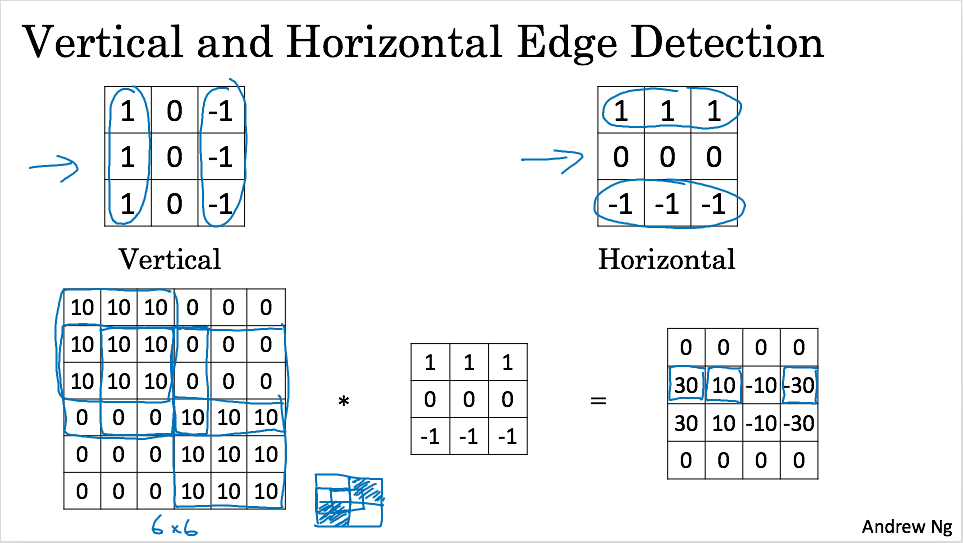

我们从上面的例子可以看出，1、0、-1可能并不是一个过滤器所能选择的最好的值，在这种情况下学者们研究出了另外一些别的过滤器，例如下图中所示的sobel滤波器和scharr滤波器。更为巧妙的是，其实我们可以把过滤器里的数值设置为可学习的特征值，从而达到人为难以确定的特定边缘探测的最优值，例如在这个3x3的过滤器里，我们设置9个参数分别为w1，w2，..，w9，然后利用和之前一样的正向传播和反向传播来训练并找出9个对应的数值。

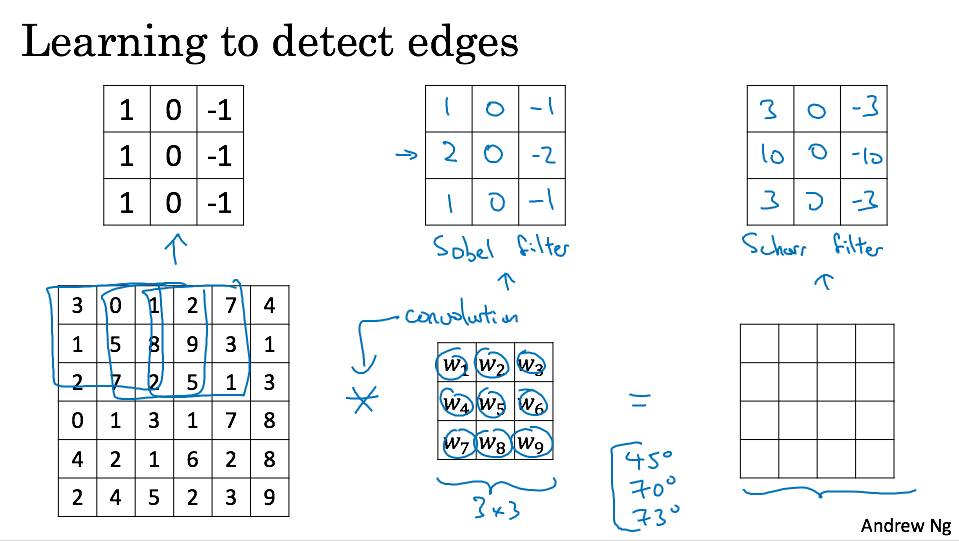

# 填充(Padding)
在上面卷积过程中，我们可以发现如果图像是n x n的矩阵，滤波器是f x f的矩阵，卷积后的矩阵则为(n-f+1) x (n-f+1)。结果相较于原图片缩小了，对于一些本身就比较小的原图片，这种卷积过程就会变得不合理。另外一个缺点是原图片中心的像素会比边缘处的像素得到更多的考虑，例如左上角的像素点只会影响一个数值，而中心的像素点会影响卷积结果矩阵中9个数值。为了减弱这两点影响，我们可以在图像轮廓周围填充，比如0，来维持图像的维度保持不变。这样，如果我们加入p层的填充，卷积后的矩阵将会为(n+2p-f+1) x (x+2p-f+1)。

基于填充的不同形式，我们可以将卷积分为两种：有效卷积和相同卷积。

## 有效卷积(Valid convolution)
不进行填充。如果图像是n x n的矩阵，滤波器是f x f的矩阵，卷积后的矩阵则为(n-f+1) x (n-f+1)。

## 相同卷积(Same convolution)
进行填充以保证卷积后的矩阵与卷积前的矩阵维度不变。

我们知道，如果我们加入p层的填充，卷积后的矩阵将会为(n+2p-f+1) x (x+2p-f+1)。所以p=(f-1)/2。f应该是一个奇数。

# 跨度卷积(Strided Convolution)